In [1]:
##########      train      ###########
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#tain data 전처리
data=pd.read_excel('/Users/jhr96/Desktop/PYTHON/excel/fault_feature 1000 2L.xls')

X_tn=data.drop(['target','type','m'], axis=1)
y_tn=data.filter(['target'])
z_tn=data.filter(['type'])

X_ac_tn=X_tn.filter(['VA_bm','VA_bph','IA_bm','IA_bph','VB_bm','VB_bph','IB_bm','IB_bph','VA_cm','VA_cph','IA_cm','IA_cph','VB_cm','VB_cph','IB_cm','IB_cph'])

row_tn=y_tn.shape[0]
yy_tn=y_tn.to_numpy()
z_tn=z_tn.to_numpy()


#one-hot

for i in range(0,row_tn-1):
    if z_tn[i]==4:
        yy_tn[i]=0
    elif z_tn[i]==5:
        yy_tn[i]=yy_tn[i]
    elif z_tn[i]==6:
        yy_tn[i]=0
    else:
        yy_tn[i]=0


yy_tn=pd.DataFrame(yy_tn)
print(yy_tn.shape)

(1000, 1)


In [3]:
#train data lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components = 3)
lda6 = lda.fit(X_ac_tn,yy_tn)

Xac_lda_tn=lda6.transform(X_ac_tn)

print(Xac_lda_tn.shape)

print(lda.explained_variance_ratio_)

(1000, 3)
[0.66577236 0.26055021 0.06228312]


c:\Users\jhr96\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


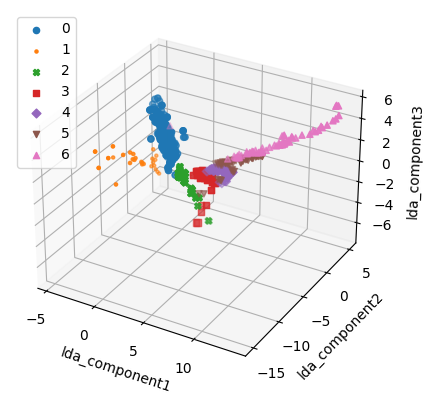

In [4]:
#lda train plot
lda_columns = ['lda_comp1', 'lda_comp2','lda_comp3']
Xac_lda_df = pd.DataFrame(Xac_lda_tn, columns=lda_columns)
Xac_lda_df['target'] = yy_tn

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

df = Xac_lda_df
markers = ['o','.','X','s','D','v','^']

for i, mark in enumerate(markers):
    df_i = df[df['target']== i]
    type_i = i
    X1 = df_i['lda_comp1']
    X2 = df_i['lda_comp2']
    X3 = df_i['lda_comp3']
    ax.scatter(X1, X2, X3,
                marker=mark,
                label=type_i)

ax.set_xlabel('lda_component1')
ax.set_ylabel('lda_component2')
ax.set_zlabel('lda_component3')
ax.legend(loc='best')
plt.savefig('test.png')
plt.show()

In [5]:
##########      ANN train      ###########
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model
from keras.utils import to_categorical

In [6]:
keras.utils.set_random_seed(1)
model = Sequential()   
yyy_tn=to_categorical(yy_tn)

In [7]:
# Adding the input layer and first hidden layer
model.add(Dense(32, kernel_initializer='he_normal', activation = 'leaky_relu', input_dim = 3))
# Adding the second hidden layer
model.add(Dense(64, kernel_initializer='he_normal', activation = 'leaky_relu'))
# Adding the output layer
model.add(Dense(7, kernel_initializer='he_normal', activation = 'softmax'))

model.summary()

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set

epoch=150
results=model.fit(Xac_lda_tn, yyy_tn, batch_size = 10, epochs = epoch, validation_split = 0.2)

result=np.array(results.history['val_accuracy'])
acc=np.array(results.history['accuracy'])

for i in range(epoch):
    if result[i] > result[i-1]:
        model.save('/Users/jhr96/Desktop/PYTHON/hj_learning_ac.h5')
    else:
        pass
        
print('Max of acc: ',max(results.history['accuracy']))
print('Max of Val_acc: ',max(results.history['val_accuracy']))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 2,695
Trainable params: 2,695
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
80/80 [==============================] - 3s 7ms/step - loss: 1.0747 - accuracy: 0.7437 - val_loss: 0.3097 - val_accuracy: 0.9300
Epoch 2/150
80/80 [==============================] - 0s 3ms/step - loss: 0.2348 - accuracy: 0.9312 - val_loss: 0.2294 - val_accuracy: 0.9400
Epoch 3/150
80/80 [=================

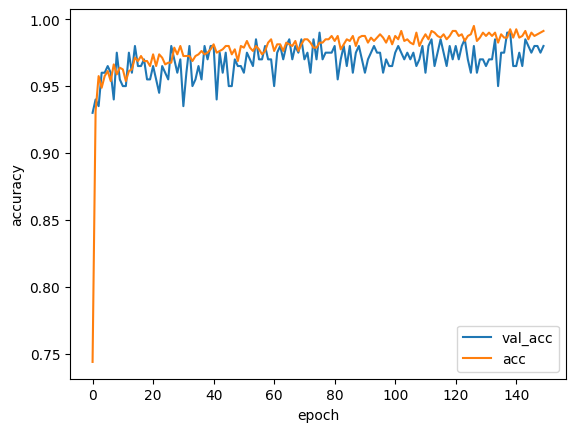

In [8]:
#train/validation acc plot
plt.plot(results.history['val_accuracy'])
plt.plot(results.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val_acc', 'acc'], loc='lower right')
plt.savefig('test.png')
plt.show()

In [9]:
##########      test      ###########
#test data 전처리
data_te=pd.read_excel('/Users/jhr96/Desktop/PYTHON/excel/fault_feature 1000 2L.xls')
X=data_te.drop(['target','type','m'],axis=1)
y=data_te.filter(['target'])
z=data_te.filter(['type'])

X_ac=X.filter(['VA_bm','VA_bph','IA_bm','IA_bph','VB_bm','VB_bph','IB_bm','IB_bph','VA_cm','VA_cph','IA_cm','IA_cph','VB_cm','VB_cph','IB_cm','IB_cph'])

row=y.shape[0]
yy=y.to_numpy()
z=z.to_numpy()

yy_ac=np.zeros((row,1))
    
for i in range(0,row-1):
    if z[i]==4:
        yy_ac[i]=0
    elif z[i]==5:
        yy_ac[i]=yy[i]
    elif z[i]==6:
        yy_ac[i]=0
    else:
        yy_ac[i]=0
        
yy_ac=pd.DataFrame(yy_ac)

In [10]:
#test data lda
Xac_lda=lda6.transform(X_ac)
Xac_lda_df = pd.DataFrame(Xac_lda)
yyy_ac=to_categorical(yy_ac)

In [11]:
#model test
modelac = load_model("hj_learning_ac.h5")

modelac.evaluate(Xac_lda, yyy_ac, batch_size = 1)
pred_ac = modelac.predict(Xac_lda, batch_size = 1)

1000/1000 [==============================] - 2s 1ms/step
